In [1]:
import pandas as pd

df = pd.read_csv('./data/전처리_지하철_요일_고유역번호_승하차차이_위도경도0717.csv', index_col=0)

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
result = df.copy()
result_diff = result[result['승하차구분'] == '승차']
group_diff = result_diff.groupby(['호선','역명','고유역번호(외부역코드)'], as_index=False)['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후','총 이용인원'].sum()
group_diff

,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
0,1호선,동대문,155,26521.0,80467.0,141386.0,256231.0,262607.0,266909.0,303188.0,...,241492.0,236810.0,241705.0,227981.0,158109.0,137481.0,124249.0,103811.0,27678.0,3936357.0
1,1호선,동묘앞,159,13283.0,57717.0,107321.0,242752.0,209124.0,250540.0,333908.0,...,228723.0,170601.0,131001.0,90725.0,64750.0,64439.0,71212.0,48750.0,22482.0,3550737.0
2,1호선,서울역,150,100422.0,578852.0,1245696.0,2535263.0,1751083.0,921043.0,809201.0,...,912337.0,1068456.0,1117093.0,753279.0,535071.0,469092.0,330805.0,174068.0,34375.0,16877899.0
3,1호선,시청,151,55156.0,278266.0,791791.0,2257594.0,1050211.0,495830.0,485122.0,...,317328.0,328033.0,303505.0,148689.0,92609.0,87148.0,63899.0,43128.0,10552.0,8423341.0
4,1호선,신설동,156,28486.0,107898.0,277500.0,672087.0,388376.0,260141.0,227137.0,...,244980.0,279579.0,346053.0,244989.0,162900.0,158020.0,137323.0,103887.0,23469.0,4560270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,2825,4606.0,28220.0,43647.0,83773.0,55354.0,59194.0,62650.0,...,128636.0,149492.0,215277.0,177475.0,106283.0,94364.0,81337.0,51186.0,13809.0,1742097.0
273,8호선,암사,2811,10883.0,63332.0,112090.0,233308.0,169599.0,145159.0,166003.0,...,384733.0,527601.0,842056.0,704440.0,397310.0,326803.0,349445.0,195343.0,54588.0,5656554.0
274,8호선,잠실(송파구청),2815,28463.0,124087.0,377478.0,940991.0,549346.0,390017.0,410435.0,...,386742.0,456405.0,532860.0,273405.0,151682.0,105117.0,81118.0,48211.0,16435.0,6428994.0
275,8호선,장지,2820,33117.0,142438.0,325193.0,565908.0,357701.0,230869.0,235229.0,...,344465.0,400324.0,613072.0,432058.0,255124.0,209053.0,211818.0,119731.0,26518.0,5581239.0


In [4]:
diff_guro_in = group_diff[group_diff['역명']=='구로디지털단지']
diff_guro_in = diff_guro_in.loc[:,'06시이전':'24시이후']
diff_guro_in = diff_guro_in.T

diff_guro_in = diff_guro_in.reset_index()
diff_guro_in.head(2)

,index,14
0,06시이전,445923.0
1,06-07시간대,625929.0


In [5]:
diff_guro_in.rename(columns={'index':'시간',14: '이용인원'}, inplace=True)
diff_guro_in.head(2)

,시간,이용인원
0,06시이전,445923.0
1,06-07시간대,625929.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

In [11]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

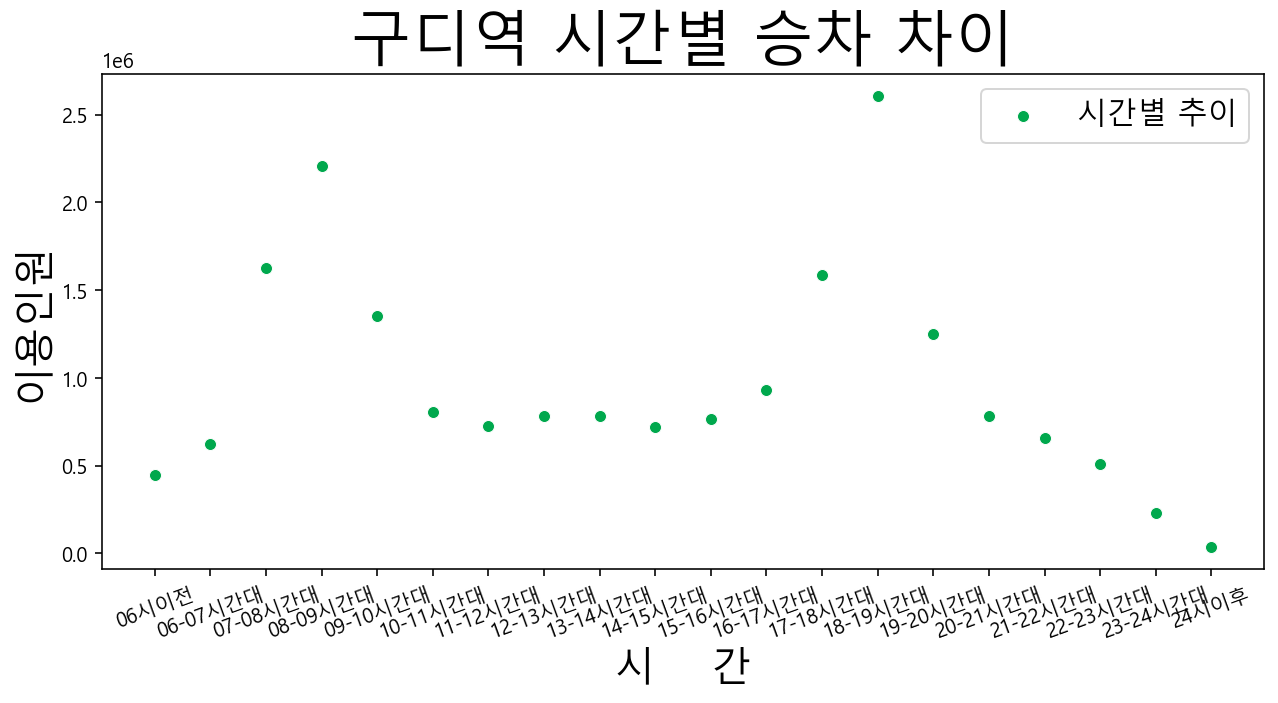

In [19]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=diff_guro_in, x='시간', y='이용인원', color='#00A84D')

plt.xticks(size=10, rotation = 20)
plt.yticks(size=10)
plt.title('구디역 시간별 승차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

In [23]:
result2 = df.copy()
result_diff = result[result['승하차구분'] == '하차']
group_diff = result_diff.groupby(['호선','역명','고유역번호(외부역코드)'], as_index=False)['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후','총 이용인원'].sum()
group_diff.head(2)

,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
0,1호선,동대문,155,26521.0,80467.0,141386.0,256231.0,262607.0,266909.0,303188.0,...,241492.0,236810.0,241705.0,227981.0,158109.0,137481.0,124249.0,103811.0,27678.0,3936357.0
1,1호선,동묘앞,159,13283.0,57717.0,107321.0,242752.0,209124.0,250540.0,333908.0,...,228723.0,170601.0,131001.0,90725.0,64750.0,64439.0,71212.0,48750.0,22482.0,3550737.0


In [24]:
diff_guro_out = group_diff[group_diff['역명']=='구로디지털단지']
diff_guro_out = diff_guro_out.loc[:,'06시이전':'24시이후']
diff_guro_out = diff_guro_out.T

diff_guro_out = diff_guro_out.reset_index()
diff_guro_out.rename(columns={'index':'시간',14: '이용인원'}, inplace=True)

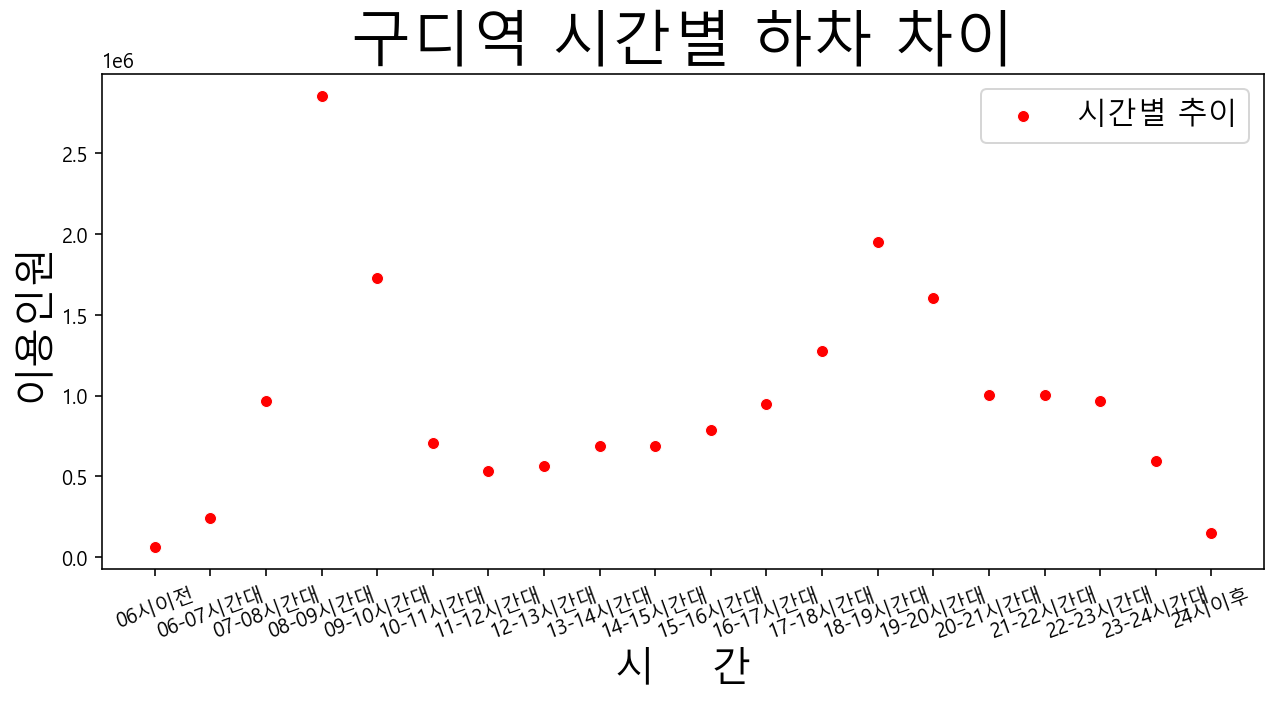

In [26]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=diff_guro_out, x='시간', y='이용인원', color='r')

plt.xticks(size=10, rotation = 20)
plt.yticks(size=10)
plt.title('구디역 시간별 하차 차이', size=30)
plt.xlabel('시    간', size=20)
plt.ylabel('이용인원', size=20)

plt.tight_layout()

plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

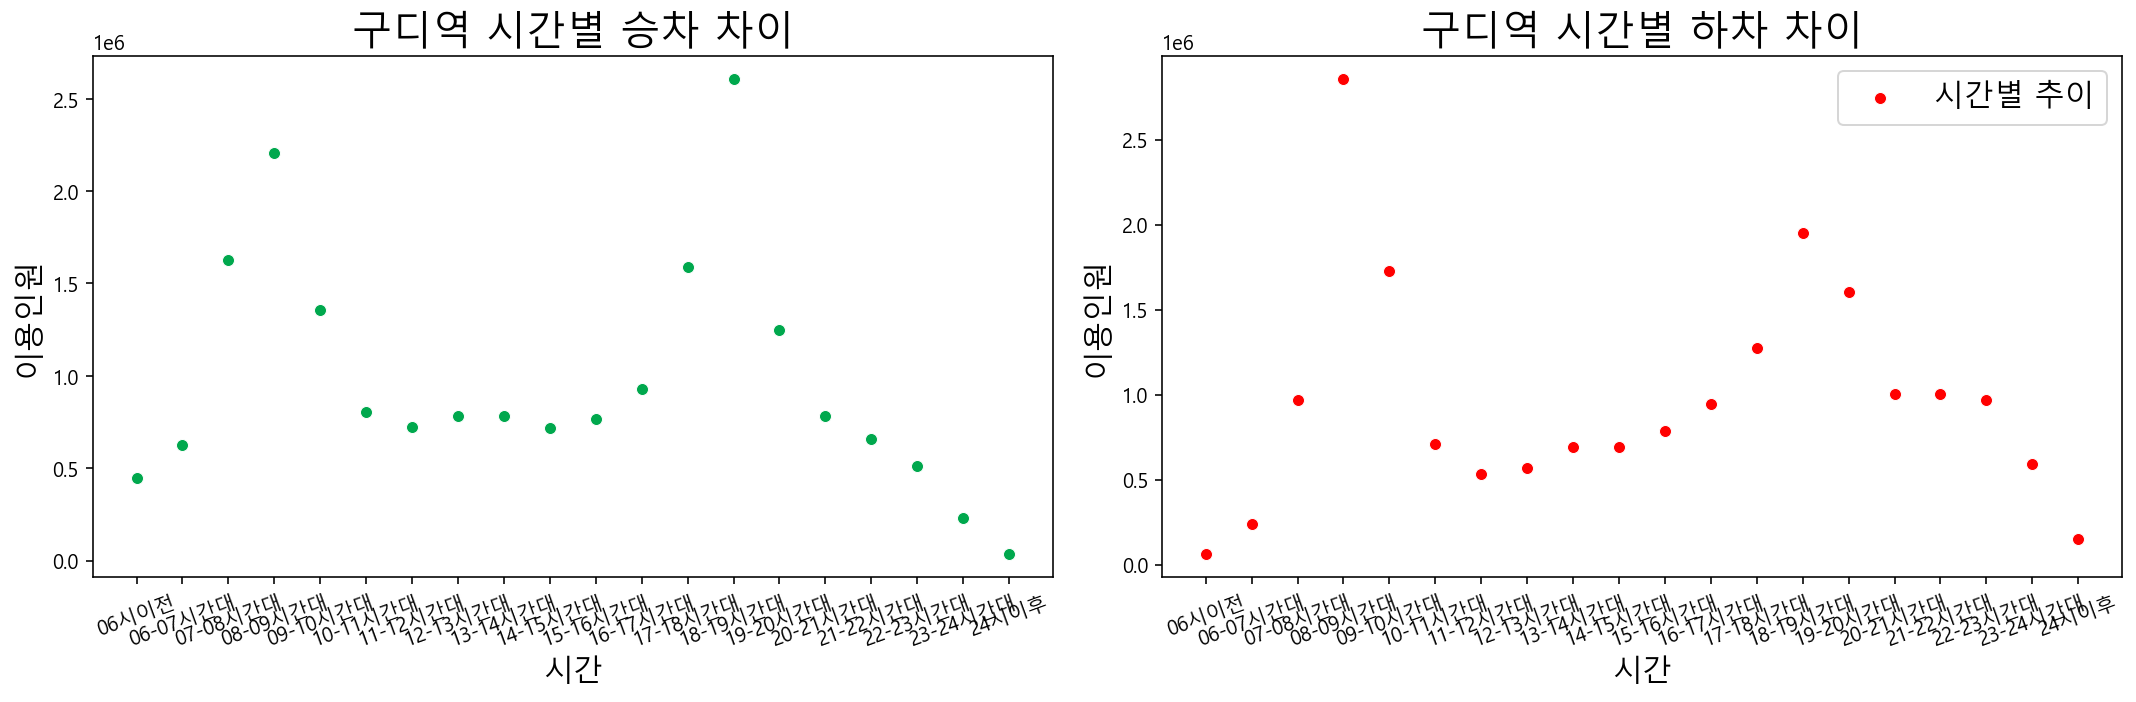

In [28]:
plt.figure(figsize=(15, 5))

# 첫 번째 그래프
plt.subplot(1, 2, 1)
sns.scatterplot(data=diff_guro_in, x='시간', y='이용인원', color='#00A84D')
plt.xticks(size=10, rotation=20)
plt.yticks(size=10)
plt.title('구디역 시간별 승차 차이', size=20)
plt.xlabel('시간', size=15)
plt.ylabel('이용인원', size=15)

# 두 번째 그래프
plt.subplot(1, 2, 2)
sns.scatterplot(data=diff_guro_out, x='시간', y='이용인원', color='r')
plt.xticks(size=10, rotation=20)
plt.yticks(size=10)
plt.title('구디역 시간별 하차 차이', size=20)
plt.xlabel('시간', size=15)
plt.ylabel('이용인원', size=15)

plt.tight_layout()
plt.legend(labels=['시간별 추이'], loc='best', fontsize=15)
plt.show()

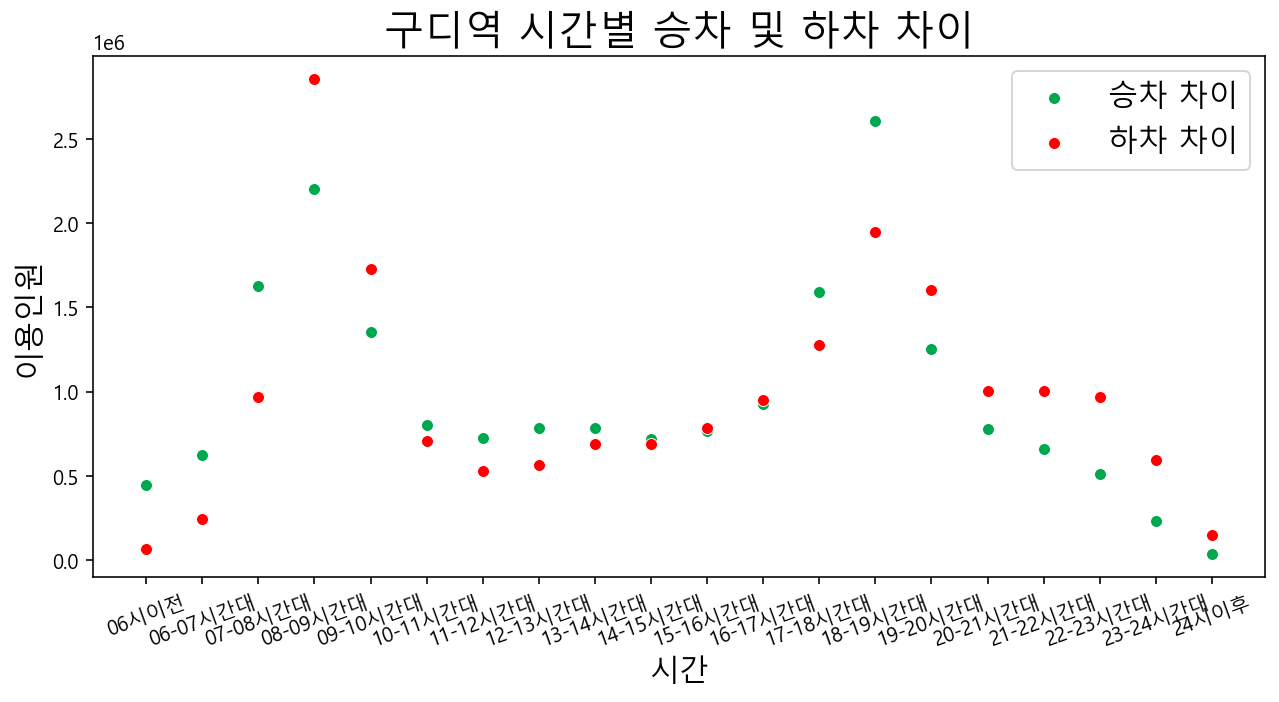

In [30]:
plt.figure(figsize=(9, 5))

# 구디 승차
sns.scatterplot(data=diff_guro_in, x='시간', y='이용인원', color='#00A84D')

# 구디 하차
sns.scatterplot(data=diff_guro_out, x='시간', y='이용인원', color='r')

plt.xticks(size=10, rotation=20)
plt.yticks(size=10)
plt.title('구디역 시간별 승차 및 하차 차이', size=20)
plt.xlabel('시간', size=15)
plt.ylabel('이용인원', size=15)

plt.tight_layout()

plt.legend(labels=['승차 차이', '하차 차이'], loc='best', fontsize=15)
plt.show()